# Weather Analysis
## Overview
### This Python script will visualize the weather of 500 unique cities across the world in random locations selected using Citypy. Citipy is a city-finding python package that was used to find randomly located cities. The OpenWeatherMap API was used to return current weather statistics for those cities.

### A series of scatter plots will be used to showcase the following relationships:
* Temperature (F) vs. Latitude.
* Humidity (%) vs. Latitude.
* Cloudiness (%) vs. Latitude.
* Wind Speed (mph) vs. Latitude.

### The script will:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

# WeatherPy

Observable Trends:
1. Temperature increases as the latitude approaches the equator (latitude 0).
2. Humidity is more concentrated at higher values as the latitude approaches the equator (latitude 0).
3. Wind speeds increase as the latitude goes away from the equator (latitude -90 and 90).


In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import Open Weather Map API key.
from owm_api_key import api_key

## Data Retrieval

In [2]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [3]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [4]:
'''Query Citipy with random lat-long values until we collect our sample, and append weather
data via Open Weather Map API call.''' 

# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.set_value(record, "city_name", city_name)
            cities_df.set_value(record, "country_code", country_code)
            cities_df.set_value(record, "rand_lat", rand_lat)
            cities_df.set_value(record, "rand_lng", rand_lng)
            cities_df.set_value(record, "Latitude", latitude)
            cities_df.set_value(record, "Longitude", longitude)
            cities_df.set_value(record, "Temp (F)", temp)
            cities_df.set_value(record, "Humidity (%)", humidity)
            cities_df.set_value(record, "Cloudiness (%)", cloud)
            cities_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

City: Stavropol. http://api.openweathermap.org/data/2.5/weather?q=krasnoyarsk-66,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 1
City: Lorengau. http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 2
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 3
City: Pahrump. http://api.openweathermap.org/data/2.5/weather?q=pahrump,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 4
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 5
City: Jamestown. http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Yellowknife. 

City: Kamaishi. http://api.openweathermap.org/data/2.5/weather?q=kamaishi,jp&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 42
City: Minab. http://api.openweathermap.org/data/2.5/weather?q=minab,ir&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 43
City: Tuatapere. http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 44
City: Vaini. http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Krasnyy Bor. http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 45
City: Klasterec nad Ohri. http://api.openweathermap.org/data/2.5/weather?q=klasterec nad ohri,cz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 46
City

City: Barrow. http://api.openweathermap.org/data/2.5/weather?q=barrow,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 79
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 80
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Necochea. http://api.openweathermap.org/data/2.5/weather?q=necochea,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 81
City: Punta Arenas. http://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial&APP

City: Tuatapere. http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Trevi. http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 109
City: Eureka. http://api.openweathermap.org/data/2.5/weather?q=eureka,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 110
City: Saint-Joseph. http://api.openweathermap.org/data/2.5/weather?q=saint-joseph,re&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 111
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 112
City: Sao Filipe. http://api.openweatherm

City: Kinablangan. http://api.openweathermap.org/data/2.5/weather?q=kinablangan,ph&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 139
City: Nisia Floresta. http://api.openweathermap.org/data/2.5/weather?q=nisia floresta,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 140
City: Talnakh. http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 141
City: Bluff. http://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Pevek. http://api.openweathermap.org/data/2.5/weather?q=pevek,ru&units=imperial&AP

City: Salem. http://api.openweathermap.org/data/2.5/weather?q=salem,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 169
City: La Ronge. http://api.openweathermap.org/data/2.5/weather?q=la ronge,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 170
City: Half Moon Bay. http://api.openweathermap.org/data/2.5/weather?q=half moon bay,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 171
City: Coihueco. http://api.openweathermap.org/data/2.5/weather?q=coihueco,cl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 172
City: Terney. http://api.openweathermap.org/data/2.5/weather?q=terney,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 173
City: Ibirama. http://api.openweathermap.org/data/2.5/weather?q=ibirama,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200

City: Mozhga. http://api.openweathermap.org/data/2.5/weather?q=mozhga,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 203
City: Ribeira Grande. http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Sterling. http://api.openweathermap.org/data/2.5/weather?q=sterling,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 204
City: Talnakh. http://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Avarua. http://api.openweathermap.org/data/2.5/weather?q=avarua,ck&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Vestmannaeyjar. http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 205
City: Upernavik. http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&u

City: Faanui. http://api.openweathermap.org/data/2.5/weather?q=faanui,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 230
City: Roper Gulf. http://api.openweathermap.org/data/2.5/weather?q=ngukurr,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 231
City: Stornoway. http://api.openweathermap.org/data/2.5/weather?q=stornoway,gb&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 232
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: New Norfolk. http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Stephenville. http://api.openweathermap.org/data/2.5/weather?q=stephenville,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 233
City: Lavrentiya. http://api.openweatherm

City: Paulo Afonso. http://api.openweathermap.org/data/2.5/weather?q=paulo afonso,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 255
City: Hermanus. http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Port Alfred. http://api.openweathermap.org/data/2.5/weather?q=port alfred,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Brodick. http://api.openweathermap.org/data/2.5/weather?q=brodick,gb&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 256
City: Saldanha. http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&units=imperial&APPID=b058195e4179dda90e

City: Chuy. http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Mar del Plata. http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Hobart. http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Sisimiut. http://api.openweathermap.org/data/2.5/weather?q=sisimiut,gl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 276
City: Busselton. http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Aldeia. http://api.openweathermap.org/data/2.5/weather?q=sento se,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 277
City: Bom

City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Rocha. http://api.openweathermap.org/data/2.5/weather?q=rocha,uy&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 295
City: Tuktoyaktuk. http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Mahebourg. http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Banjar. http://api.openweathermap.org/data/2.5/weather?q=banjar,id&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 296
City: Skelleftea. http://api.openweathermap.org/data/2.5/weather?q=skelleftea,se&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 297
City: East London. http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&

City: Butaritari. http://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Nagram. http://api.openweathermap.org/data/2.5/weather?q=nagram,in&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 320
City: Kapaa. http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Hailar. http://api.openweathermap.org/data/2.5/weather?q=hailar,cn&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 321
City: Albany. http://api.openweathermap.org/data/2.5/weather?q=albany,au&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Sur. 

City: Souillac. http://api.openweathermap.org/data/2.5/weather?q=souillac,mu&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Saint-Philippe. http://api.openweathermap.org/data/2.5/weather?q=saint-philippe,re&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Genhe. http://api.openweathermap.org/data/2.5/weather?q=genhe,cn&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 344
City: Ribeira Grande. http://api.openweathermap.org/data/2.5/weather?q=ribeira grande,pt&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Castro. http://api.openweathermap.org/data/2.5/weather?q=castro,cl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Provideniya. http://api.openw

City: Srandakan. http://api.openweathermap.org/data/2.5/weather?q=srandakan,id&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 363
City: Dingle. http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 364
City: Dukat. http://api.openweathermap.org/data/2.5/weather?q=dukat,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 365
City: Bay Roberts. http://api.openweathermap.org/data/2.5/weather?q=bay roberts,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 366
City: Hermagor. http://api.openweathermap.org/data/2.5/weather?q=hermagor,at&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 367
City: Teguldet. http://api.openweathermap.org/data/2.5/weather?q=teguldet,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200

City: Lebu. http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Ust-Omchug. http://api.openweathermap.org/data/2.5/weather?q=ust-omchug,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 388
City: Kodinsk. http://api.openweathermap.org/data/2.5/weather?q=kodinsk,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 389
City: Rikitea. http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Yellowknife. http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Chuy. http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Tarariras

City: Khatanga. http://api.openweathermap.org/data/2.5/weather?q=khatanga,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Dikson. http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Touros. http://api.openweathermap.org/data/2.5/weather?q=touros,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 409
City: Vostok. http://api.openweathermap.org/data/2.5/weather?q=vostok,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 410
City: Kurayoshi. http://api.openweathermap.org/data/2.5/weather?q=kurayoshi,jp&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 411
City: Amparihy. http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Jiujiang. http://api.openweathermap.org/data/2.5/weather?q=jiujiang,cn&units=imperial&APPID=b0581

City: Wanning. http://api.openweathermap.org/data/2.5/weather?q=wanning,cn&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 433
City: Natal. http://api.openweathermap.org/data/2.5/weather?q=natal,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 434
City: Mathura. http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Barreirinhas. http://api.openweathermap.org/data/2.5/weather?q=barreirinhas,br&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 435
City: Maicao. http://api.openweathermap.org/data/2.5/weather?q=maicao,co&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 436
City: Hilo. http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Weyburn. http://api.openweathermap.org/data/2.5/weather?q=weyb

City: Bethel. http://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Cockburn Town. http://api.openweathermap.org/data/2.5/weather?q=cockburn town,tc&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 456
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Tasiilaq. http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Cape Town. http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Ushuaia. http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Puerto Ayora. http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
City: Provideniya. http://api.o

City: Yei. http://api.openweathermap.org/data/2.5/weather?q=tambura,sd&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 477
City: West Richland. http://api.openweathermap.org/data/2.5/weather?q=west richland,us&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 478
City: Dalian. http://api.openweathermap.org/data/2.5/weather?q=dalian,cn&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 479
City: Itoman. http://api.openweathermap.org/data/2.5/weather?q=itoman,jp&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 480
City: Komsomolskiy. http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&units=imperial&APPID=b058195e4179dda90e7316cc7ec35d34
Status code: 200. DF length is now: 481
City: Vila Franca do Campo. http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo,pt&units=imperial&APPID=b058195e4179dda90e7

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,krasnoyarsk-66,ru,56.38,91.69,45.04,41.97,71.6,56,0,6.71
1,lorengau,pg,2.38,148.34,-2.02,147.27,81.99,100,36,6.64
2,dikson,ru,89.83,68.77,73.51,80.55,37.53,100,12,20.51
3,pahrump,us,37.92,-116.57,36.21,-115.98,67.46,72,40,4.7
4,jamestown,sh,-41.31,-16.47,-15.94,-5.72,66.69,100,88,12.8


In [5]:
# The total sample size.
len(cities_df)

500

## Save csv

In [7]:
# Save the DataFrame as a csv
cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

## Plot Graphs

###  Latitude vs. Temperature Plot

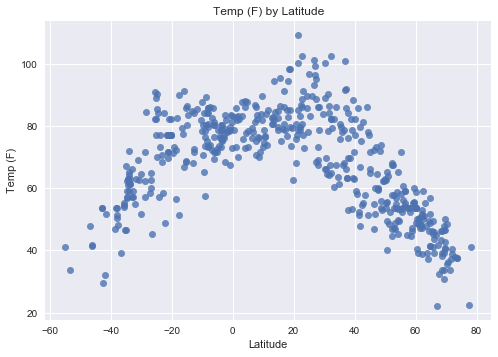

In [8]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

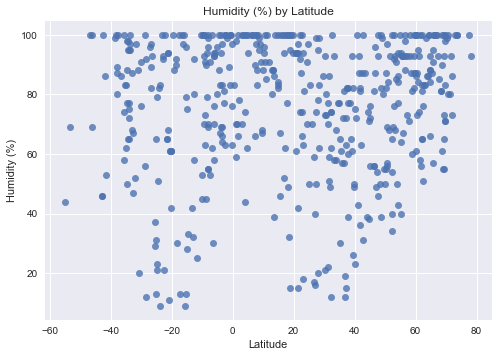

In [9]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

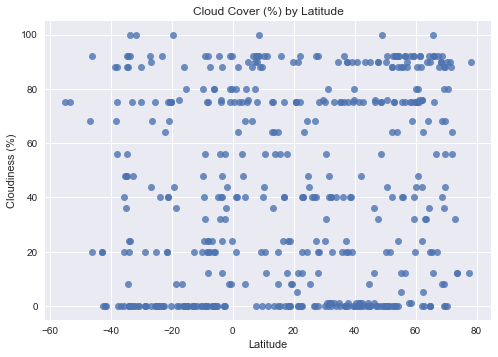

In [10]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

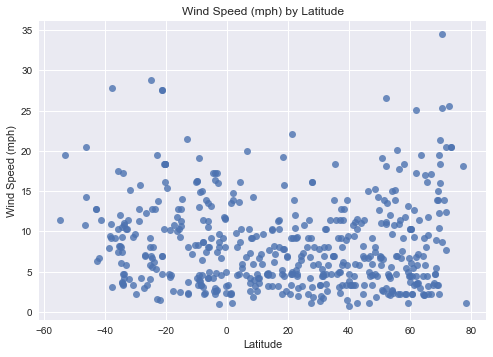

In [11]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()